# Read & interpret dataset

Loading some datasets <p>
Preprocessing missing values and outliers on the datasets

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime


# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## JEPX_Intra_datasets
http://www.jepx.org/market/index.html

In [2]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Intra_dataset
df_intra_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2016.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2017.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2018.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2019.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2020.csv', sep=',', header=0, encoding='shift_jis')

In [3]:
# marge all the intra datasets
df_intra = pd.concat([df_intra_2016, df_intra_2017])
df_intra = pd.concat([df_intra, df_intra_2018])
df_intra = pd.concat([df_intra, df_intra_2019])
df_intra = pd.concat([df_intra, df_intra_2020])

In [4]:
df_intra = df_intra.rename(columns={'年月日': 'Date', 
                                    '時刻コード': 'HH',
                                    '始値（円/kWh）': 'Open',
                                    '高値（円/kWh）': 'High',
                                    '安値（円/kWh）': 'Low',
                                    '終値（円/kWh）': 'Close',
                                    '平均（円/kWh）': 'Average',
                                    '約定量合計（MWh/h）': 'Volume(MWh/h)',
                                    '約定件数': 'Volume(Tick count)'})

In [5]:
# # Apply to_datetime
df_intra["Date"] = pd.to_datetime(df_intra["Date"])

In [6]:
df_intra.tail()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
14148,2021-01-20,37,200.00,203.98,150.00,199.30,186.25,1750.4,239
14149,2021-01-20,38,200.00,203.98,49.00,49.00,181.21,1414.0,244
14150,2021-01-20,39,200.00,200.50,49.00,49.00,176.98,1006.9,197
14151,2021-01-20,40,184.24,190.00,69.89,69.89,159.62,781.6,141
14152,2021-01-20,41,200.00,201.00,69.89,69.89,174.45,1036.4,150


In [7]:
df_intra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84281 entries, 0 to 14152
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                84281 non-null  datetime64[ns]
 1   HH                  84281 non-null  int64         
 2   Open                84209 non-null  float64       
 3   High                84209 non-null  float64       
 4   Low                 84209 non-null  float64       
 5   Close               84209 non-null  float64       
 6   Average             84209 non-null  float64       
 7   Volume(MWh/h)       84209 non-null  float64       
 8   Volume(Tick count)  84281 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.4 MB


## Half Hourly time slot

時間の切上げ切り捨てについて
https://www.deep-rain.com/programming/python/1355#i-4

In [8]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = HH_table['Time'].str[-8:]
# HH_table['Hourly_Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').floor("H").strftime('%H:%M')
# HH_table['Hourly_Time'] = pd.to_datetime(HH_table['Hourly_Time']).dt.time

HH_table.head()

,HH,Time
0,1,00:00
1,2,00:30
2,3,01:00
3,4,01:30
4,5,02:00


# Make all_data

In [9]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = pd.to_datetime(HH_table['Time']).dt.time

HH_table.head()

,HH,Time
0,1,00:00:00
1,2,00:30:00
2,3,01:00:00
3,4,01:30:00
4,5,02:00:00


## Merge all input data

In [10]:
all_data = df_intra.copy()

# HH_table
all_data = pd.merge(all_data, HH_table, how="left", on=['HH'])

# # System price
# all_data = pd.merge(all_data, df_spot, how="left", on=['Date', 'HH'])

all_data.tail(10)

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time
84271,2021-01-20,32,68.89,79.89,14.90,68.89,58.74,662.1,157,15:30:00
84272,2021-01-20,33,200.00,203.98,124.88,189.68,172.50,603.8,170,16:00:00
84273,2021-01-20,34,200.00,203.98,160.00,160.00,187.78,1191.2,217,16:30:00
84274,2021-01-20,35,200.00,204.00,150.00,189.68,186.24,1809.6,235,17:00:00
84275,2021-01-20,36,200.00,204.00,150.00,199.30,186.18,1888.4,244,17:30:00
84276,2021-01-20,37,200.00,203.98,150.00,199.30,186.25,1750.4,239,18:00:00
84277,2021-01-20,38,200.00,203.98,49.00,49.00,181.21,1414.0,244,18:30:00
84278,2021-01-20,39,200.00,200.50,49.00,49.00,176.98,1006.9,197,19:00:00
84279,2021-01-20,40,184.24,190.00,69.89,69.89,159.62,781.6,141,19:30:00
84280,2021-01-20,41,200.00,201.00,69.89,69.89,174.45,1036.4,150,20:00:00


In [11]:
print(all_data.isnull().sum())

Date                   0
HH                     0
Open                  72
High                  72
Low                   72
Close                 72
Average               72
Volume(MWh/h)         72
Volume(Tick count)     0
Time                   0
dtype: int64


In [12]:
# Fillna with the average between the previous and later slots for Price, Weather, Demend
all_data.interpolate(method='linear', inplace=True)
print(all_data.isnull().sum())

Date                  0
HH                    0
Open                  0
High                  0
Low                   0
Close                 0
Average               0
Volume(MWh/h)         0
Volume(Tick count)    0
Time                  0
dtype: int64


In [13]:
# Create a column for "date block num"
all_data['Date'] = pd.to_datetime(all_data['Date'])
# all_data["date_block_num"] = np.trunc(all_data['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

※ Filter all_data from 2016-04-01 to 2020-12-31

In [14]:
all_data = all_data[all_data["Date"] <= "2020-12-31"]

In [15]:
# all_data['month'] = pd.to_datetime(all_data["Date"]).dt.month

In [16]:
all_data.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.70,1,00:00:00
1,2016-04-01,2,7.45,7.45,7.45,7.45,7.45,0.75,0,00:30:00
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.80,1,01:00:00
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.80,1,01:30:00
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.80,1,02:00:00


In [17]:
all_data.shape

(83328, 10)

# Feature Engineering

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [18]:
# Check the remaining memory on PC
import gc
gc.collect()

100

In [19]:
# This is for generating lag
def generate_lag(train, lag_sizes, cols, lag_sizes_type):

    lag_sizes = np.array(lag_sizes)
    if lag_sizes_type == "HH":
        lag_sizes_adj = lag_sizes * 1 # nothing changes
    elif lag_sizes_type == "Hours":
        lag_sizes_adj = lag_sizes * 2
    elif lag_sizes_type == "Day":
        lag_sizes_adj = lag_sizes * 48

    for ix, lag_sizes_adj_ in enumerate(lag_sizes_adj):
        shifted_df = all_data[cols].shift(lag_sizes_adj_)
        shifted_df.columns = [f"{col_name}_lag_{lag_sizes[ix]}_{lag_sizes_type}" for col_name in shifted_df.columns]
        if ix == 0:
            shifted_df_return = shifted_df
        else:
            shifted_df_return = shifted_df_return.merge(shifted_df, how="left", left_index=True, right_index=True)
    return shifted_df_return

- Prediction point is at 17:00 on a day before the delivery date.
- At least, 2day-lag is necessary to avoid data leakage.

In [20]:
# Drop columns that are not necessary to generate lag features
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH'
#                                      , 'System_price(Yen/kWh)'
#                                      , 'month'
                                    ])

# Generate lag features and drop original columns
# all_data_lagged_HH = generate_lag(all_data, [49, 97], lag_columns, "HH")
# all_data_lagged_Hour = generate_lag(all_data, [2], lag_columns, "Hours")
all_data_lagged_Day = generate_lag(all_data, [2, 3], lag_columns, "Day")

# join everything
# all_data_lagged = pd.merge(all_data, all_data_lagged_HH, how="left", left_index=True, right_index=True)
# all_data = pd.merge(all_data, all_data_lagged_Hour, how="left", left_index=True, right_index=True)
all_data_lagged = pd.merge(all_data, all_data_lagged_Day, how="left", left_index=True, right_index=True)

# Drop lag_columns which can be data leakage
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

# Keep both the original and lagged "Close" --> Original: target / Lagged: feature
all_data_lagged["Close"] = all_data["Close"]

In [21]:
# # Check the lag columns
# temp_col = [item for item in all_data_lagged.columns if item.find('Day') != -1]

# print(temp_col)

In [22]:
print(all_data_lagged.isnull().sum().head(50))

Date                              0
HH                                0
Time                              0
Open_lag_2_Day                   96
High_lag_2_Day                   96
Low_lag_2_Day                    96
Close_lag_2_Day                  96
Average_lag_2_Day                96
Volume(MWh/h)_lag_2_Day          96
Volume(Tick count)_lag_2_Day     96
Open_lag_3_Day                  144
High_lag_3_Day                  144
Low_lag_3_Day                   144
Close_lag_3_Day                 144
Average_lag_3_Day               144
Volume(MWh/h)_lag_3_Day         144
Volume(Tick count)_lag_3_Day    144
Close                             0
dtype: int64


In [23]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().head(50))

Date                            0
HH                              0
Time                            0
Open_lag_2_Day                  0
High_lag_2_Day                  0
Low_lag_2_Day                   0
Close_lag_2_Day                 0
Average_lag_2_Day               0
Volume(MWh/h)_lag_2_Day         0
Volume(Tick count)_lag_2_Day    0
Open_lag_3_Day                  0
High_lag_3_Day                  0
Low_lag_3_Day                   0
Close_lag_3_Day                 0
Average_lag_3_Day               0
Volume(MWh/h)_lag_3_Day         0
Volume(Tick count)_lag_3_Day    0
Close                           0
dtype: int64


## Standardise with Log-features (対数化)

[Mission]
対数の逆対数変換をして元の数値を得ること
-->グラフで可視化してみる (Closeと対数化Close)線グラフ
-->逆対数の数式を手動で適用してみる
-->

Skew: 5.771550
Kurt: 75.846330


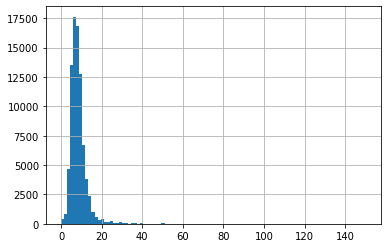

In [24]:
all_data_lagged["Close"].hist(bins=100);
print("Skew: %f" % all_data_lagged["Close"].skew())
print("Kurt: %f" % all_data_lagged["Close"].kurt())

- Positive skew
- High kurt --> Fat tail

In [25]:
cols = all_data_lagged.columns

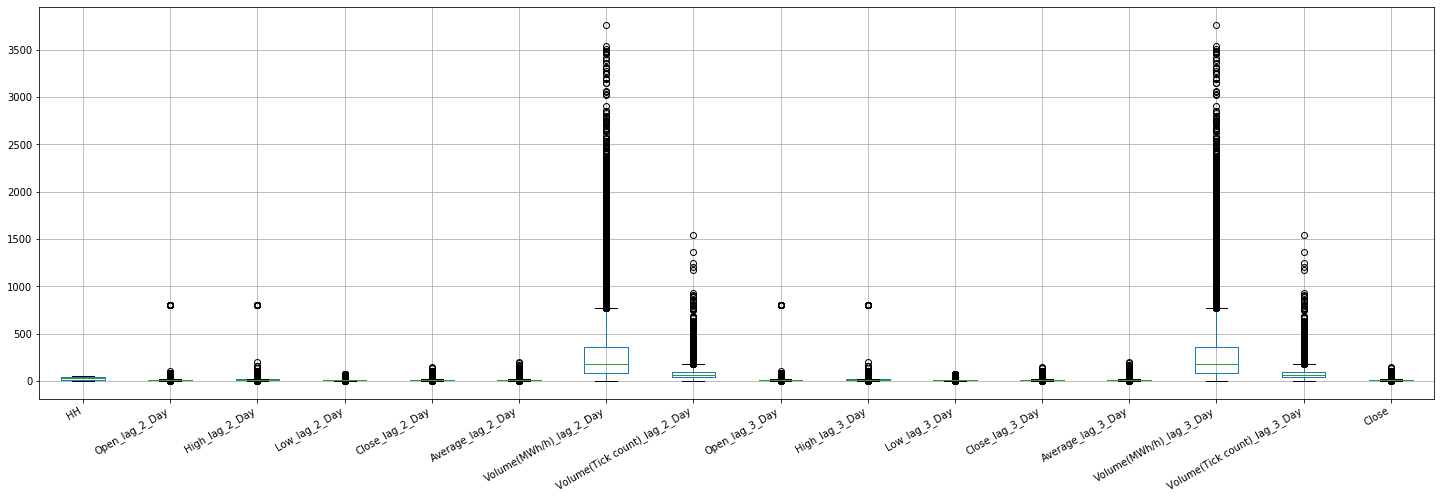

In [26]:
plt.figure(figsize = (25,8))
all_data_lagged[cols].boxplot()
plt.gcf().autofmt_xdate()

plt.show()

Features seem to be positive skew, and have different scale. --> Need to standardise

In [27]:
for i in all_data_lagged:
   print(str(min(all_data_lagged[i])) + "\t" + str(i))

2016-04-01 00:00:00	Date
1	HH
00:00:00	Time
0.0	Open_lag_2_Day
0.0	High_lag_2_Day
0.0	Low_lag_2_Day
0.0	Close_lag_2_Day
0.0	Average_lag_2_Day
0.0	Volume(MWh/h)_lag_2_Day
0.0	Volume(Tick count)_lag_2_Day
0.0	Open_lag_3_Day
0.0	High_lag_3_Day
0.0	Low_lag_3_Day
0.0	Close_lag_3_Day
0.0	Average_lag_3_Day
0.0	Volume(MWh/h)_lag_3_Day
0.0	Volume(Tick count)_lag_3_Day
0.01	Close


In [28]:
all_data_lagged1 = all_data_lagged[['Date', 'Time', 'HH'
#                                     , 'month'
                                   ]]
all_data_lagged2 = all_data_lagged.drop(['Date', 'Time', 'HH'
#                                          , 'month'
                                        ], axis=1)

In [29]:
# logarithmic transformation for standardised
# PowerTransformer() for applying Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
def trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.transform(df2)

def inverse_trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.inverse_transform(df2)

In [30]:
#　対数変換
all_data_log2_transformed = all_data_lagged2.copy()
cols = all_data_log2_transformed.columns

all_data_log2_transformed = trans_yeo_johnson(all_data_lagged2, all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

In [31]:
all_data_log = pd.concat([all_data_lagged1, all_data_log2_transformed], axis=1)

Skew: 0.016581
Kurt: 5.092394
Mean: -0.000000
Std: 1.000006


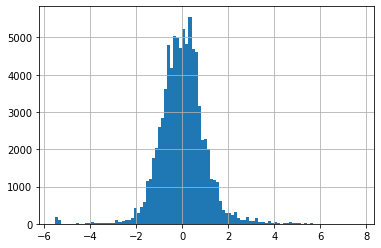

In [32]:
all_data_log["Close"].hist(bins=100);
print("Skew: %f" % all_data_log["Close"].skew())
print("Kurt: %f" % all_data_log["Close"].kurt())
print("Mean: %f" % all_data_log["Close"].mean())
print("Std: %f" % all_data_log["Close"].std())

In [33]:
print(all_data_log.isnull().sum().head(50))

Date                            0
Time                            0
HH                              0
Open_lag_2_Day                  0
High_lag_2_Day                  0
Low_lag_2_Day                   0
Close_lag_2_Day                 0
Average_lag_2_Day               0
Volume(MWh/h)_lag_2_Day         0
Volume(Tick count)_lag_2_Day    0
Open_lag_3_Day                  0
High_lag_3_Day                  0
Low_lag_3_Day                   0
Close_lag_3_Day                 0
Average_lag_3_Day               0
Volume(MWh/h)_lag_3_Day         0
Volume(Tick count)_lag_3_Day    0
Close                           0
dtype: int64


※ Confirm whether inverse transform works appropriately, or not

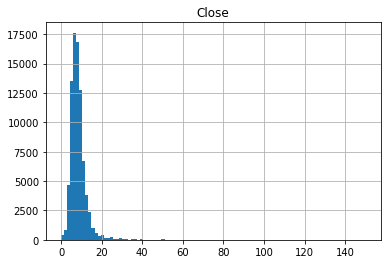

In [34]:
# inverse only for Close (Target)
y_log_inversed = inverse_trans_yeo_johnson(all_data_lagged2["Close"].values.reshape(-1,1), all_data_log["Close"].values.reshape(-1, 1))
y_log_inversed = pd.DataFrame(y_log_inversed)
y_log_inversed.columns = ["Close"]
y_log_inversed.hist(bins=100);

# EDA (for all_data)

## Check the correlation of features with the target
    -->上位相関(正と負)はピックアップして更に数値にしてみる

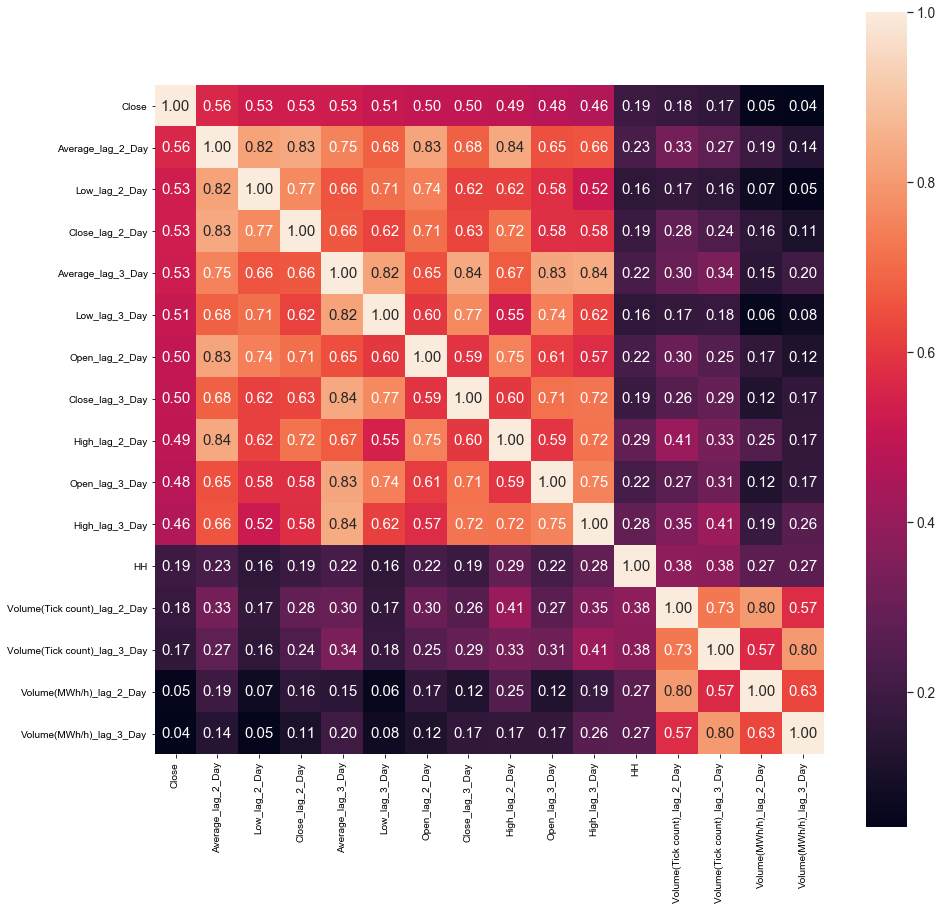

In [35]:
# correlation matrix
corrmat = all_data_log.corr()

k = 20 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

※In the case of Day1_lag: Ave=0.65, Low=0.62, Open=0.57, Low_HHlag=0.57,HIgh=0.56,Ave_HHlag=0.55<p>

In [36]:
# # scatterplot
# sns.set()
# cols = all_data_log.columns
# # cols = ['Close', 'Average_lag_1_Day', 'Average_lag_49_HH', 'Low_lag_1_Day', 'Low_lag_49_HH', 
# #         'Open_lag_1_Day', 'Open_lag_49_HH', 'High_lag_1_Day', 'High_lag_49_HH', 'Average_lag_2_Day']
# sns.pairplot(all_data_log[cols], size=2.5)
# plt.show()

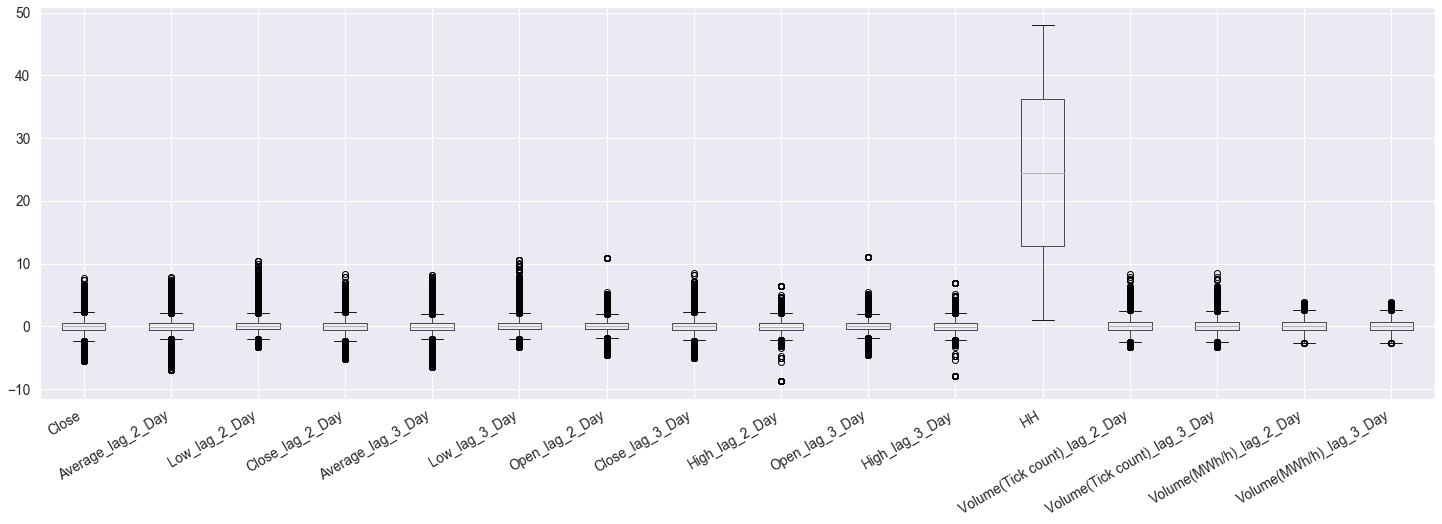

In [37]:
plt.figure(figsize = (25,8))
all_data_log[cols].boxplot()
plt.gcf().autofmt_xdate()

plt.show()

# Training Models with "all_data"

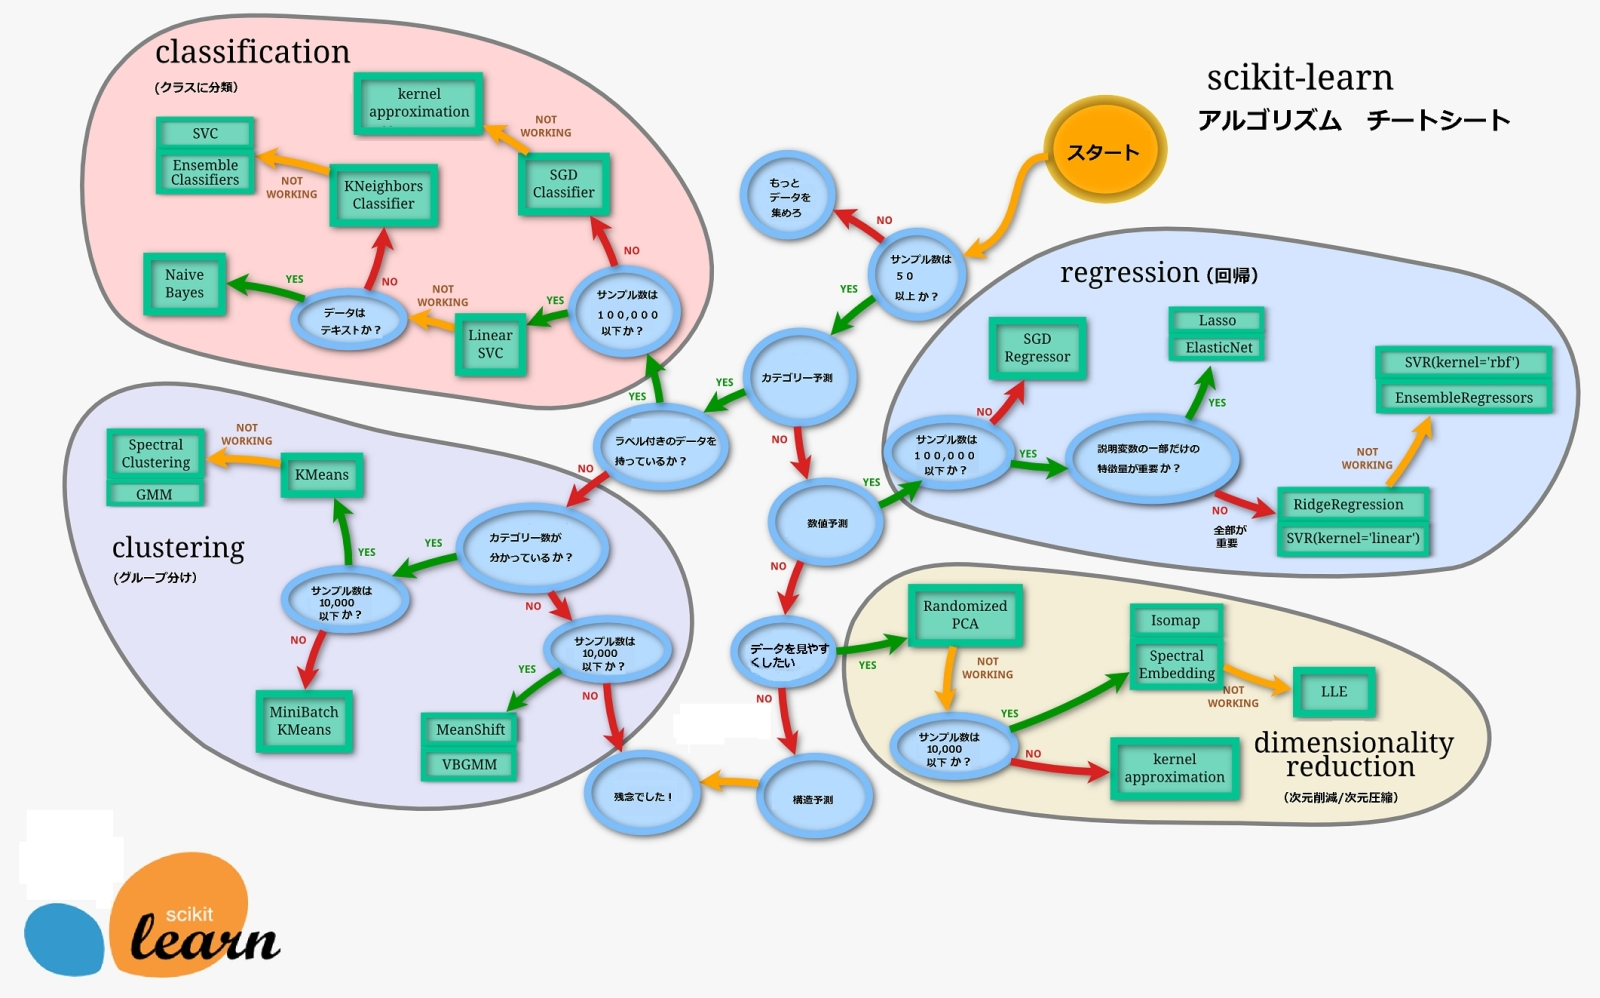

Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

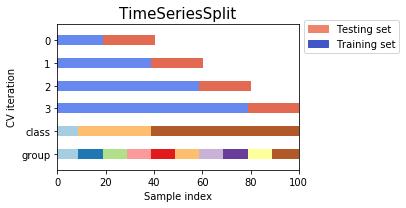

Split all_data set based on time-base

※Sckitlearn for TimeseriesSplit, using "max_train_size" parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

## Preparation

In [38]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Close

In [39]:
# Rolling/Walk forward validation (Timeseries validation with the parameter of "max_train_size")
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
train_ratio=8
test_ratio=2
max_train_size= 48*365
test_size=int(round((len(X)*test_ratio)/(train_ratio+test_ratio*n_splits), 0))

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size
                       , max_train_size=max_train_size
                      )
Min_valid_index = len(X) - (n_splits * test_size)

print(tscv)
print('Minimum of valid_index: %.0f' % Min_valid_index)

# Confirming the split logic
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("TRAIN:", train_index, "Valid:", valid_index)

TimeSeriesSplit(gap=0, max_train_size=17520, n_splits=10, test_size=5952)
Minimum of valid_index: 23808
TRAIN: [ 6288  6289  6290 ... 23805 23806 23807] Valid: [23808 23809 23810 ... 29757 29758 29759]
TRAIN: [12240 12241 12242 ... 29757 29758 29759] Valid: [29760 29761 29762 ... 35709 35710 35711]
TRAIN: [18192 18193 18194 ... 35709 35710 35711] Valid: [35712 35713 35714 ... 41661 41662 41663]
TRAIN: [24144 24145 24146 ... 41661 41662 41663] Valid: [41664 41665 41666 ... 47613 47614 47615]
TRAIN: [30096 30097 30098 ... 47613 47614 47615] Valid: [47616 47617 47618 ... 53565 53566 53567]
TRAIN: [36048 36049 36050 ... 53565 53566 53567] Valid: [53568 53569 53570 ... 59517 59518 59519]
TRAIN: [42000 42001 42002 ... 59517 59518 59519] Valid: [59520 59521 59522 ... 65469 65470 65471]
TRAIN: [47952 47953 47954 ... 65469 65470 65471] Valid: [65472 65473 65474 ... 71421 71422 71423]
TRAIN: [53904 53905 53906 ... 71421 71422 71423] Valid: [71424 71425 71426 ... 77373 77374 77375]
TRAIN: [59856 

(Reference)

- Out_of_Sample_test(Rolling origin): file:///Users/kenotsu/Downloads/OutofSampleTests2000.pdf

Make the tables for graph visualisation and for evaluation results

In [40]:
# DataTable for graph_log
graph_data_log = all_data_log[["Date", "Time", "Close"]]
graph_data_log["DateTime"] = pd.to_datetime(graph_data_log["Date"].astype(str) + " " + graph_data_log["Time"].astype(str))
prediction_point = graph_data_log["DateTime"][graph_data_log.index==Min_valid_index].iat[-1]
graph_data_log = graph_data_log.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation results_log
Eval_table_log = pd.DataFrame()
Eval_table_log["EvalFunc"] = pd.Series(["RMSE_log", "MAE_log"])
Eval_table_log

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_log
1,MAE_log


In [41]:
# DataTable for graph_original
graph_data_original = all_data_lagged[["Date", "Time", "Close"]]
graph_data_original["DateTime"] = pd.to_datetime(graph_data_original["Date"].astype(str) + " " + graph_data_original["Time"].astype(str))
prediction_point = graph_data_original["DateTime"][graph_data_original.index==Min_valid_index].iat[-1]
graph_data_original = graph_data_original.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation functions_original
Eval_table_original = pd.DataFrame()
Eval_table_original["EvalFunc"] = pd.Series(["RMSE_Yen/kWh", "MAE_Yen/kWh"])
Eval_table_original

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_Yen/kWh
1,MAE_Yen/kWh


## Linear model

LassoとRidgeは以下を参照
https://hira03.hatenablog.com/entry/LinearRegression_Ridge_Lasso#LinearRegression%E3%81%A7%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E7%94%9F%E6%88%90%E3%81%99%E3%82%8B

### Linear regression

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
import itertools

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Line = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLine = LinearRegression().fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Line.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Line = list(itertools.chain.from_iterable(prediction_Line))
#  Get prediction with train data
modelLine = LinearRegression().fit(X, y)
y_pred_train = list(modelLine.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Linear"] = pd.Series(y_pred_train + prediction_Line)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Linear"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Linear = pd.Series(rmse)
mae_10fold_Linear = pd.Series(mae)

Training_accuracy: 0.2693690169787374
Valid_accuracy: 0.1885864605254035
RMSE: 0.8238701298556819
MAE: 0.5781747940429737


### Ridge

In [43]:
# Searching the optimal alpha
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.1, 1, 3, 7, 10]: # alphaで特に結果の違いなし (0.1, 1, 3, 7, 10)
        modelRidge = Ridge(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelRidge.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelRidge.score(X_valid, y_valid)))
        y_pred = modelRidge.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelRidge.coef_ != 0)))


 alpha=0.1
Train set score: 0.28
Test set score: 0.14
RMSE: 0.73
MAE: 0.54
Number of features used:15

 alpha=1
Train set score: 0.28
Test set score: 0.14
RMSE: 0.73
MAE: 0.54
Number of features used:15

 alpha=3
Train set score: 0.28
Test set score: 0.14
RMSE: 0.73
MAE: 0.54
Number of features used:15

 alpha=7
Train set score: 0.28
Test set score: 0.14
RMSE: 0.73
MAE: 0.54
Number of features used:15

 alpha=10
Train set score: 0.28
Test set score: 0.14
RMSE: 0.73
MAE: 0.54
Number of features used:15

 alpha=0.1
Train set score: 0.23
Test set score: 0.22
RMSE: 0.80
MAE: 0.59
Number of features used:15

 alpha=1
Train set score: 0.23
Test set score: 0.22
RMSE: 0.80
MAE: 0.59
Number of features used:15

 alpha=3
Train set score: 0.23
Test set score: 0.22
RMSE: 0.80
MAE: 0.59
Number of features used:15

 alpha=7
Train set score: 0.23
Test set score: 0.22
RMSE: 0.80
MAE: 0.59
Number of features used:15

 alpha=10
Train set score: 0.23
Test set score: 0.22
RMSE: 0.80
MAE: 0.59
Number of f

All the parameter has the same result. -->Choose "10"

In [44]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Ridge = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model
    modelRidge = linear_model.Ridge(alpha=10).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelRidge.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Ridge.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelRidge.score(X_train, y_train))     
    valid_accuracy.append(modelRidge.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Ridge = list(itertools.chain.from_iterable(prediction_Ridge))
#  Get prediction with train data
modelRidge = linear_model.Ridge(alpha=10).fit(X, y)
y_pred_train = list(modelRidge.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Ridge"] = pd.Series(y_pred_train + prediction_Ridge)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Ridge"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Ridge = pd.Series(rmse)
mae_10fold_Ridge = pd.Series(mae)

Training_accuracy: 0.26936891410947367
Valid_accuracy: 0.1886094854504312
RMSE: 0.823860942749764
MAE: 0.5781639801711494


### Lasso

In [45]:
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.02, 0.5, 1]: #0.02 is the best (0.02, 0.5, 1)
        modelLasso = Lasso(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelLasso.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelLasso.score(X_valid, y_valid)))
        y_pred = modelLasso.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelLasso.coef_ != 0)))


 alpha=0.02
Train set score: 0.27
Test set score: 0.16
RMSE: 0.72
MAE: 0.53
Number of features used:11

 alpha=0.5
Train set score: 0.06
Test set score: 0.03
RMSE: 0.77
MAE: 0.59
Number of features used:1

 alpha=1
Train set score: 0.05
Test set score: 0.03
RMSE: 0.78
MAE: 0.59
Number of features used:1

 alpha=0.02
Train set score: 0.22
Test set score: 0.21
RMSE: 0.80
MAE: 0.59
Number of features used:9

 alpha=0.5
Train set score: 0.05
Test set score: -0.37
RMSE: 1.05
MAE: 0.79
Number of features used:1

 alpha=1
Train set score: 0.04
Test set score: -0.37
RMSE: 1.06
MAE: 0.79
Number of features used:1

 alpha=0.02
Train set score: 0.34
Test set score: 0.22
RMSE: 0.76
MAE: 0.55
Number of features used:7

 alpha=0.5
Train set score: 0.04
Test set score: 0.05
RMSE: 0.84
MAE: 0.59
Number of features used:1

 alpha=1
Train set score: 0.04
Test set score: 0.04
RMSE: 0.85
MAE: 0.59
Number of features used:1

 alpha=0.02
Train set score: 0.31
Test set score: 0.20
RMSE: 0.60
MAE: 0.45
Numbe

0.02 is the optimal

In [46]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Lasso = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLasso = linear_model.Lasso(alpha=0.02).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLasso.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Lasso.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLasso.score(X_train, y_train))     
    valid_accuracy.append(modelLasso.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Lasso = list(itertools.chain.from_iterable(prediction_Lasso))
#  Get prediction with train data
modelLasso = linear_model.Lasso(alpha=0.02).fit(X, y)
y_pred_train = list(modelLasso.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Lasso"] = pd.Series(y_pred_train + prediction_Lasso)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Lasso"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Lasso = pd.Series(rmse)
mae_10fold_Lasso = pd.Series(mae)

Training_accuracy: 0.2662478667011951
Valid_accuracy: 0.1784668571684465
RMSE: 0.829883710042167
MAE: 0.583247736884555


Ridge is a little bit better than others

### Interpretation of the linear model (Only for the best model)
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [47]:
print("Intercept: {}".format(modelLine.intercept_))

feature_names = X_train.columns
coefs = pd.DataFrame(modelLasso.coef_, columns=['Coefficients'], index=feature_names
).sort_values('Coefficients', ascending=False)

# Absolute value of coefficients
coef_abs = coefs.abs()
print(coef_abs.head(10))

Intercept: -0.10639875930839848
                   Coefficients
Low_lag_2_Day          0.124187
Close_lag_2_Day        0.111008
Average_lag_2_Day      0.099410
Low_lag_3_Day          0.084961
Close_lag_3_Day        0.067453
High_lag_2_Day         0.047484
Average_lag_3_Day      0.040841
Open_lag_3_Day         0.039613
Open_lag_2_Day         0.027118
High_lag_3_Day         0.024719


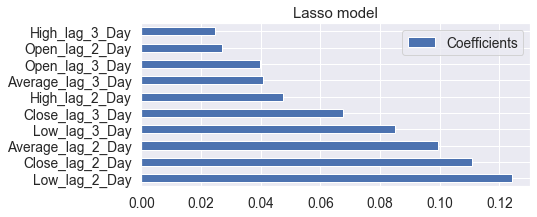

In [48]:
# Positive coeficients
coefs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

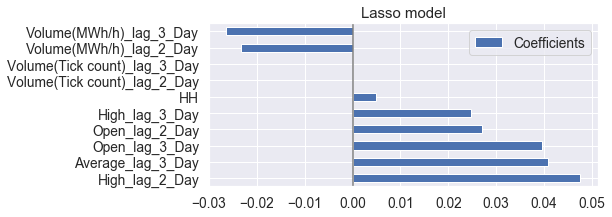

In [49]:
# Negative coeficients
end = len(coefs)
start = end - 10
coefs[start:end].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

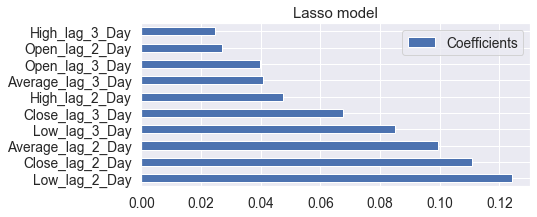

In [50]:
# Absolute coeficients
coef_abs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

- Check RMSE/MAE of each fold

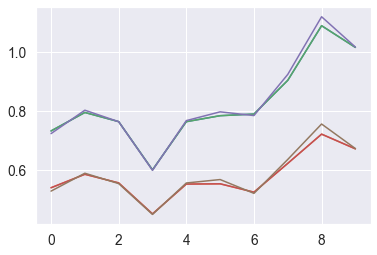

In [51]:
rmse_10fold_Linear.plot()
mae_10fold_Linear.plot()
rmse_10fold_Ridge.plot()
mae_10fold_Ridge.plot()
rmse_10fold_Lasso.plot()
mae_10fold_Lasso.plot()

## Non-linear model

### Linear Regression with PolynomialFeatures

In [52]:
from sklearn.preprocessing import PolynomialFeatures

dimension = 2

# 多項式をつくる
polynomial = PolynomialFeatures(degree=dimension)
Poly_X = polynomial.fit_transform(X)
Poly_X = pd.DataFrame(Poly_X)

Poly_X.shape

(83328, 136)

In [53]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_PolyLine = []
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = Poly_X.iloc[train_index], Poly_X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelPolyLine = LinearRegression().fit(X_train, y_train)
    
    # Generate prediction results
    y_pred = modelPolyLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_PolyLine.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelPolyLine.score(X_train, y_train))     
    valid_accuracy.append(modelPolyLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_PolyLine = list(itertools.chain.from_iterable(prediction_PolyLine))
#  Get prediction with train data
modelPolyLine = LinearRegression().fit(Poly_X, y)
y_pred_train = list(modelPolyLine.predict(Poly_X)[:Min_valid_index])
# Store the prediction into the "graph data" table
#graph_data_log = graph_data_log.reset_index()
graph_data_log["Close_pred_PolyLinear"] = pd.Series(y_pred_train + prediction_PolyLine)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["PolyLinear"] = pd.Series([np.mean(rmse), np.mean(mae)])

Training_accuracy: 0.31612722248584785
Valid_accuracy: 0.10223991902339895
RMSE: 0.8647885112492556
MAE: 0.6031618820398028


### XGBoost

In [54]:
from xgboost import XGBRegressor

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_XGB = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    #Fit train set to the model
    modelXGB = XGBRegressor().fit(X_train, y_train)   
    # Generate prediction results
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_XGB.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelXGB.score(X_train, y_train))     
    valid_accuracy.append(modelXGB.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_XGB = list(itertools.chain.from_iterable(prediction_XGB))
#  Get prediction with train data
modelXGB = XGBRegressor().fit(X, y)   
y_pred_train = list(modelXGB.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_XGB"] = pd.Series(y_pred_train + prediction_XGB)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["XGB"] = pd.Series([np.mean(rmse), np.mean(mae)])

Training_accuracy: 0.7572558468830216
Valid_accuracy: 0.02081857600810084
RMSE: 0.909146642337803
MAE: 0.6497185130114385


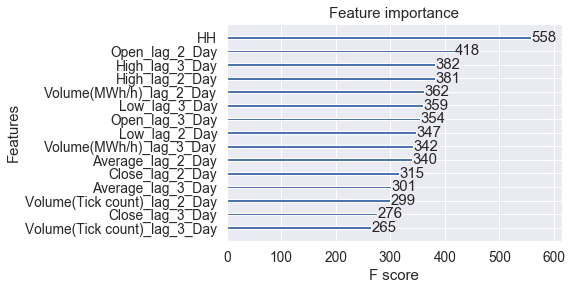

<Figure size 1000x500 with 0 Axes>

In [55]:
from xgboost import plot_importance

# plot feature importance
plot_importance(modelXGB, max_num_features = 20)
plt.figure(figsize=(10, 5),dpi=100)
plt.show()

## Statistical model 

In [56]:
y_stats_original = all_data.copy()
y_stats_original = y_stats_original[["Date", "Time", "Close"]]
y_stats_original["DateTime"] = pd.to_datetime(y_stats_original["Date"].astype(str) + " " + y_stats_original["Time"].astype(str))
y_stats_original = y_stats_original.drop(["Date", "Time"], axis=1)
y_stats_original.head()

,Close,DateTime
0,7.69,2016-04-01 00:00:00
1,7.45,2016-04-01 00:30:00
2,7.21,2016-04-01 01:00:00
3,7.06,2016-04-01 01:30:00
4,7.21,2016-04-01 02:00:00


In [57]:
y_stats_original.to_csv('/Users/kenotsu/Downloads/y_stats_original.csv', index=False)

In [58]:
# Data for statistical modeling
y_stats_log = all_data_log[["Date", "Time", "Close"]]
y_stats_log["DateTime"] = pd.to_datetime(y_stats_log["Date"].astype(str) + " " + y_stats_log["Time"].astype(str))
y_stats_log = y_stats_log.drop(["Date", "Time"], axis=1)

In [59]:
# y_stats_log.to_csv('/Users/kenotsu/Downloads/y_stats_log.csv', index=False)

In [60]:
# ADF test for logarithmic price
ctt = sm.tsa.adfuller(y_stats_original.Close, regression="ctt")
round(ctt[1], 4)

0.0

Null hypothesis on ADF test could be rejected, so logarithmic price can be used for modeling.

### ARIMA

(reference) <p>

- Intuitive： https://logics-of-blue.com/python-time-series-analysis/ <p>
    -->Parameter: https://logics-of-blue.com/wp-content/uploads/2017/05/python-time-series-analysis-notebook.html#ARIMA%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%8E%A8%E5%AE%9A
    
- Detailed: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [61]:
# # Top 5 coefficient from Linear model
# coef_abs = coefs.abs()
# coef_abs_list = list(coef_abs[:5].index)

# coef_abs_list=["System_price(Yen/kWh)"]

# Pick up  Date, Time , Close and cols that have high importance on the linear model
arima_cols = ["Date", "Time", "Close"]
# arima_cols = arima_cols + coef_abs_list
arima_cols

['Date', 'Time', 'Close']

In [62]:
# # Data for statistical modeling
# all_data_stats = all_data.copy()
# all_data_stats = all_data_stats[arima_cols]
# all_data_stats["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
# all_data_stats = all_data_stats.drop(["Date", "Time"], axis=1)
# X_stats = all_data_stats.drop(['Close', "DateTime"], axis=1)
# X_stats =  np.array(X_stats)
# y_stats = all_data_stats[["Close"]]
# y_stats =  np.array(y_stats)

In [63]:
# Data for statistical modeling
all_data_stats = all_data_log.copy()
all_data_stats = all_data_stats[arima_cols]
all_data_stats["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
all_data_stats = all_data_stats.drop(["Date", "Time"], axis=1)
X_stats = all_data_stats.drop(['Close', "DateTime"], axis=1)
X_stats =  np.array(X_stats)
y_stats = all_data_stats[["Close"]]
y_stats =  np.array(y_stats)

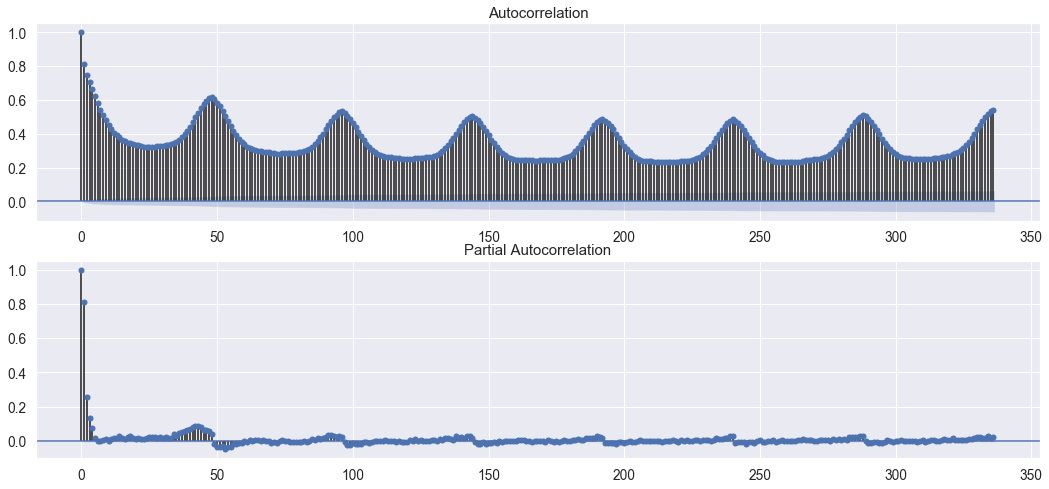

In [64]:
# Autocorrelation
fig = plt.figure(figsize=(18,8))
# Autocorrelation (1lag=30min --> 336 lags=1week)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_stats, lags=336, ax=ax1)

# Partial Autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_stats, lags=336, ax=ax2)

In [65]:
# # Searching the optimal parameters for ARIMA
# import warnings
# warnings.filterwarnings('ignore') # 計算警告を非表示
# resDiff = sm.tsa.arma_order_select_ic(y_stats_original.Close, ic='aic', trend='nc', fit_kw={"method":'css'})
# resDiff

In [66]:
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y_stats,
                       order=(3, 0, 2),
                  ).fit()

# Summary
print(modelARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83328
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -69265.533
Date:                Tue, 11 May 2021   AIC                         138545.066
Time:                        10:41:34   BIC                         138610.379
Sample:                             0   HQIC                        138565.051
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.018      0.009      0.993      -0.035       0.035
ar.L1          1.3578      0.118     11.520      0.000       1.127       1.589
ar.L2         -0.4733      0.123     -3.834      0.0

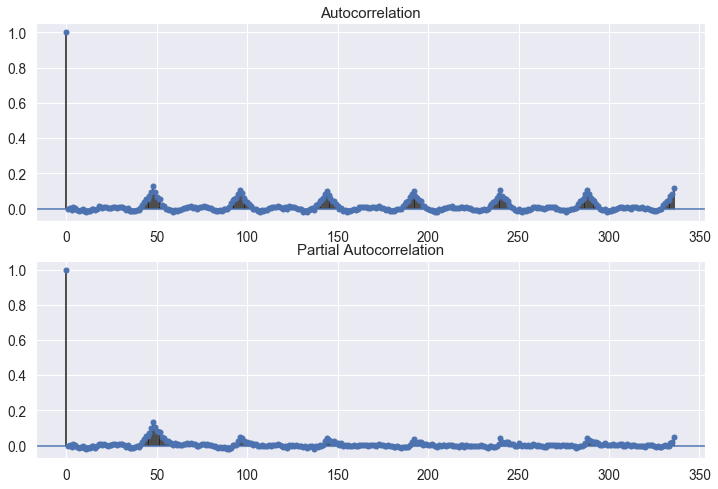

In [67]:
# Check the residual
resid = modelARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

In [68]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_ARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 

    #Fit train set to the model
    modelARIMA = ARIMA(y_train,
                       order=(3, 0, 2),
                      ).fit() #上記セルのパラメータを参照
    # Generate prediction results
    y_pred = modelARIMA.forecast(steps=test_size
                                ) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_ARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_ARIMA = list(itertools.chain.from_iterable(prediction_ARIMA))
# Get prediction with train data
modelARIMA = ARIMA(all_data_stats.Close[:Min_valid_index], order=(3, 0, 2)).fit()
y_pred_train = list(modelARIMA.predict())
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_ARIMA"] = pd.Series(y_pred_train + prediction_ARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["ARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 1.0071521269247754
MAE: 0.7289605603515431


### SARIMAX

データ数を減らしてトレーニングする(1年分)

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelSARIMA = SARIMAX(y_stats[83328-17520:], 
                       order=(3, 0, 2), seasonal_order=(0, 1, 1, 48)
                     ).fit()
print(modelSARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                17520
Model:             SARIMAX(3, 0, 2)x(0, 1, [1], 48)   Log Likelihood              -18239.646
Date:                              Tue, 11 May 2021   AIC                          36493.293
Time:                                      10:50:52   BIC                          36547.671
Sample:                                           0   HQIC                         36511.201
                                            - 17520                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6513      3.922      0.166      0.868      -7.035       8.338
ar.L2          0.38

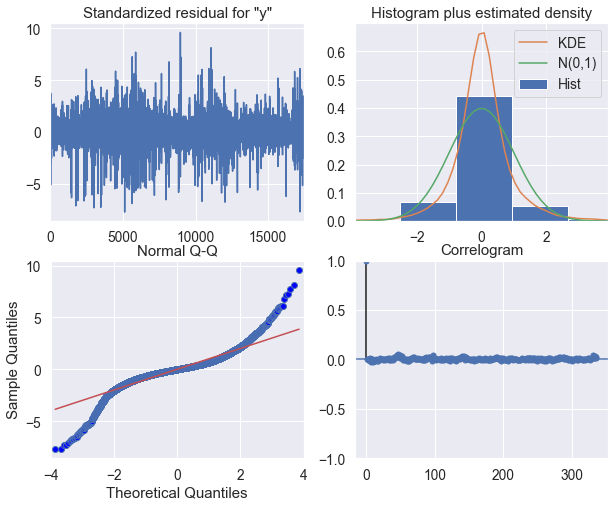

In [70]:
# Check residual (If periodicity can be seen, SARIMA model would be better)
# Plot/confirm residual (White noise)
modelSARIMA.plot_diagnostics(lags=336, figsize=[10, 8]);

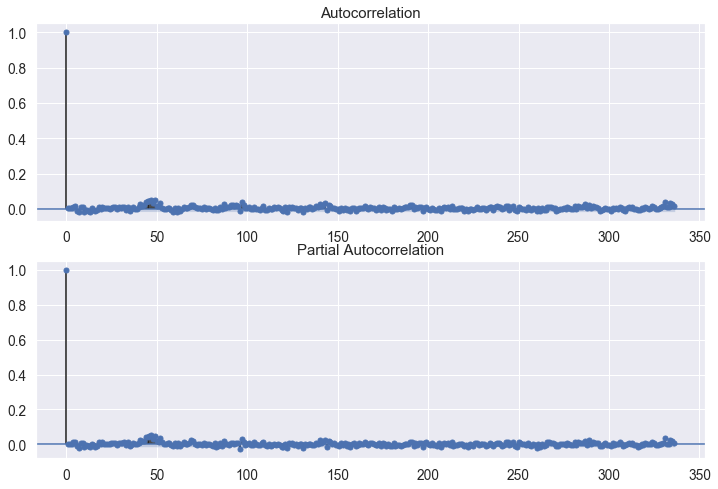

In [71]:
# Plot pertial Autocorrelation
resid = modelSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

SARIMAモデルのほうが季節性をカバーできているみたい --> SARIMAXですすめる

上記AICを確認し、AICが最小のパラメータの組み合わせをモデルに適用する

In [84]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_SARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 
 
    #Fit train set to the model
    modelSARIMA = SARIMAX(y_train,
                       order=(1, 1, 3), seasonal_order=(0, 1, 1, 48)
                      ).fit()
    # Generate prediction results
    y_pred = modelSARIMA.forecast(steps=test_size) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_SARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_SARIMA = list(itertools.chain.from_iterable(prediction_SARIMA))
# get prediction with train data
modelSARIMA = SARIMAX(all_data_stats[:Min_valid_index].Close, order=(3, 0, 2), seasonal_order=(0, 1, 1, 48)).fit()
y_pred_train = list(modelSARIMA.predict())
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_SARIMA"] = pd.Series(y_pred_train + prediction_SARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["SARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 1.4623748705343036
MAE: 1.1826039386788096


Visualise for ARIMA model:
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

## Prophet (From Facebook)
Documentation of Prophet from Facebook:
https://peerj.com/preprints/3190/

Another documentation in Japanese:
https://mikiokubo.github.io/analytics/15forecast.html

In [73]:
# # # Pick up  Date, Time , Close and cols that have high importance on the linear model
# X_cols = ["System_price(Yen/kWh)"]

In [89]:
all_data_prop = all_data_lagged[["Close"]]
all_data_prop["DateTime"] = all_data_stats["DateTime"]
all_data_prop.head()

,Close,DateTime
0,7.69,2016-04-01 00:00:00
1,7.45,2016-04-01 00:30:00
2,7.21,2016-04-01 01:00:00
3,7.06,2016-04-01 01:30:00
4,7.21,2016-04-01 02:00:00


In [90]:
# Set ds and y for the model
all_data_prop = all_data_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [91]:
# Divide dataset into train/valid set
all_data_prop_train = all_data_prop.iloc[all_data_prop.index[:len(X)-test_size]]
all_data_prop_valid = all_data_prop.iloc[all_data_prop.index[len(X)-test_size:]]

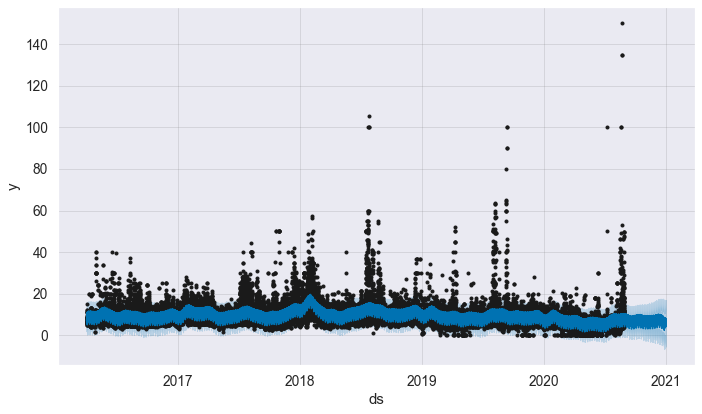

In [92]:
from fbprophet import Prophet

# fit train data
modelProp = Prophet(yearly_seasonality=True)
modelProp = modelProp.fit(all_data_prop_train)
# Make prediction datatable
future = modelProp.make_future_dataframe(periods=len(all_data_prop_valid), freq='30min')

# Plot
forecast = modelProp.predict(future)
modelProp.plot(forecast);

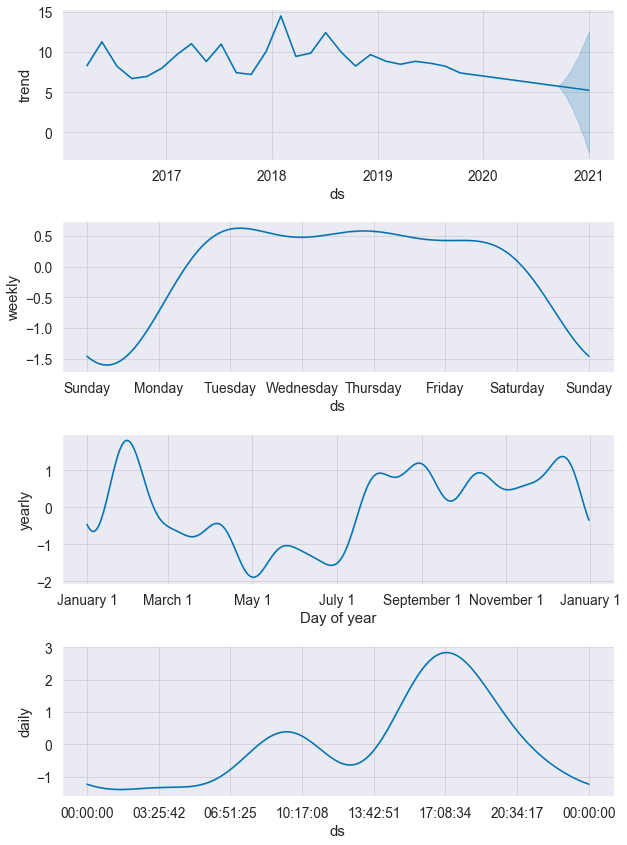

In [93]:
modelProp.plot_components(forecast);

- Modelling with cross validation

In [94]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Prophet = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    train_prop, valid_prop = all_data_prop.iloc[train_index], all_data_prop.iloc[valid_index]
#     y_train, y_valid = train_prop.set_index("ds"), valid_prop.set_index("ds")

    # fit train data
    modelProphet = Prophet(yearly_seasonality=True) 
    modelProphet = modelProphet.fit(train_prop) 
    # Make prediction datatable (Need to adjust the parameter of period to match the number of rows)
    future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')

    # Generate prediction results
#     future = future.fillna(0, inplace=True)
    forecast = modelProphet.predict(future)
    forecast.index = forecast.index + train_index[0] # index adjustment due to max_train_size

    y_pred = forecast["yhat"][valid_index]
    true_values = valid_prop["y"]
    # Save prediction results
    prediction_Prophet.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Prophet = list(itertools.chain.from_iterable(prediction_Prophet))

# Prediction with train data
modelProphet = Prophet(yearly_seasonality=True) 
modelProphet = modelProphet.fit(all_data_prop[:Min_valid_index]) 
future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')
forecast = modelProphet.predict(future)
forecast.index = forecast.index + train_index[0]
y_pred_train = list(forecast["yhat"][:Min_valid_index])

# Store the prediction into the "graph data" table
graph_data_original["Close_pred_Prophet"] = pd.Series(y_pred_train + prediction_Prophet)
# Store the result of evaluation into the "Eval_table"
Eval_table_original["Prophet"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 7.417303470573709
MAE: 5.604586445700043


In [95]:
graph_data_original

,Close,DateTime,Close_pred_Prophet,Close_pred_Linear,Close_pred_Ridge,Close_pred_Lasso,Close_pred_PolyLinear,Close_pred_XGB,Close_pred_ARIMA,Close_pred_SARIMA
0,7.69,2016-04-01 00:00:00,6.562889,1.255722,1.255694,1.323978,3.426281,7.357775,7.941169,7.940620
1,7.45,2016-04-01 00:30:00,6.498019,1.259601,1.259573,1.328563,3.506319,7.357775,7.736403,7.690000
2,7.21,2016-04-01 01:00:00,6.496403,1.263487,1.263459,1.333157,3.587018,7.357775,7.578462,6.700000
3,7.06,2016-04-01 01:30:00,6.543266,1.267379,1.267352,1.337760,3.668363,7.357775,7.402240,3.500001
4,7.21,2016-04-01 02:00:00,6.613445,1.271278,1.271251,1.342372,3.750340,7.351285,7.258178,6.299999
...,...,...,...,...,...,...,...,...,...,...
83323,70.00,2020-12-31 21:30:00,-16.058897,12.403723,12.403167,12.199217,12.531043,12.185808,6.144855,NaN
83324,45.48,2020-12-31 22:00:00,-16.287842,13.947504,13.945605,13.770756,14.739399,9.946253,6.144855,NaN
83325,41.33,2020-12-31 22:30:00,-16.483321,14.769055,14.766728,14.507761,15.952223,14.545691,6.144855,NaN
83326,36.66,2020-12-31 23:00:00,-16.653287,9.461340,9.461158,9.463549,11.269720,12.880904,6.144855,NaN


# Visualisation of the model performance 

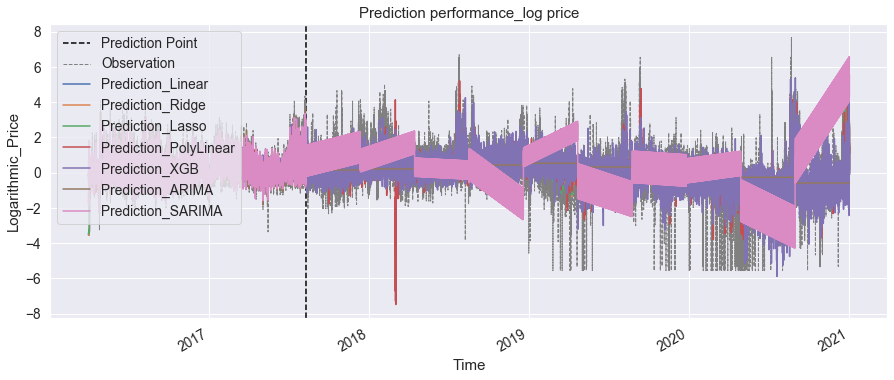

In [96]:
#対数化されたターゲットと予測値の比較

Models = ["Linear", "Ridge", "Lasso"
          , "PolyLinear", "XGB", "ARIMA", "SARIMA"
         ]

start = "2016-04-01 00:00:00"
end = "2020-12-31 23:30:00"

fig, ax = plt.subplots(1, figsize=(15, 6))
plt.title('Prediction performance_log price')

# Set index
graph_data_log = graph_data_log.set_index("DateTime")

# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Prediction Point", linestyle="dashed", color="black")

# Plot Close 
graph_data_log.Close[graph_data_log.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_log["Close_pred_" + model][graph_data_log.index > start].plot(ax=ax, label="Prediction_" + model)

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Logarithmic_Price")
plt.legend(loc="upper left");

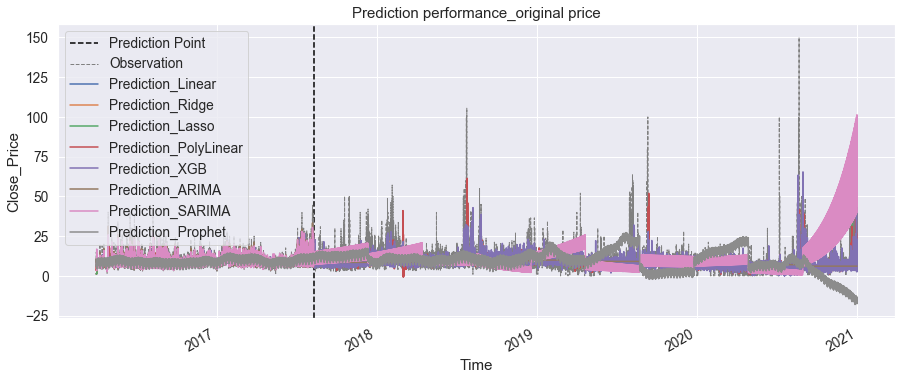

In [97]:
# graph_data_original = graph_data_original.reset_index()

Models = ["Linear", "Ridge", "Lasso"
          , "PolyLinear", "XGB", "ARIMA", "SARIMA"
         ]

for model in Models:
    # inverse for Prediction
    y_pred_original = inverse_trans_yeo_johnson(all_data_lagged["Close"].values.reshape(-1,1), graph_data_log["Close_pred_" + model].values.reshape(-1, 1))
    y_pred_original =  pd.DataFrame(y_pred_original)
    # Add the data on "graph_data"
    graph_data_original["Close_pred_" + model] = y_pred_original
    
    # Validation setに対してYen/kWhでの評価
    rmse = sqrt(mean_squared_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:]))
    mae = mean_absolute_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:])
    # Store the result of evaluation into the "Eval_table"
    Eval_table_original[model] = pd.Series([np.mean(rmse), np.mean(mae)])

graph_data_original = graph_data_original.set_index("DateTime")

# Plot the original close price and  predicted price
fig, ax = plt.subplots(1, figsize=(15, 6))
# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Prediction Point", linestyle="dashed", color="black")

# Plot Close
graph_data_original.Close[graph_data_original.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_original["Close_pred_" + model][graph_data_original.index > start].plot(ax=ax, label="Prediction_" + model)

#Plot Prophet
graph_data_original["Close_pred_Prophet"][graph_data_original.index > start].plot(ax=ax, label="Prediction_Prophet")

# x-axis
plt.title('Prediction performance_original price')
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Close_Price")
plt.legend(loc="upper left");

In [98]:
# Evalation for the prediction of validation data based on log
Eval_table_log

,EvalFunc,Linear,Ridge,Lasso,PolyLinear,XGB,ARIMA,SARIMA
0,RMSE_log,0.823870,0.823861,0.829884,0.864789,0.909147,1.007152,1.462375
1,MAE_log,0.578175,0.578164,0.583248,0.603162,0.649719,0.728961,1.182604


In [99]:
# Evalation for the prediction of validation data based on original
Eval_table_original

,EvalFunc,Prophet,Linear,Ridge,Lasso,PolyLinear,XGB,ARIMA,SARIMA
0,RMSE_Yen/kWh,7.417303,4.365480,4.365438,4.376109,4.464770,4.609498,5.043417,8.902218
1,MAE_Yen/kWh,5.604586,2.197474,2.197420,2.208426,2.275876,2.423481,2.703048,5.129546


# 当Noteの結論 (予定)

- 自己回帰のパフォーマンスと機械学習のパフォーマンスを比べてみる
- ここでのパフォーマンスをベンチマークとして、別のNoteで特徴量を加えた機械学習の改善度合いを見てみる
- さらにどの特徴量が特に重要であるかも確認する
- 注目したい点は、out-of-sampleのパフォーマンスと価格スパイクのカバー度合い